In [5]:
import xgboost as xgb
import pandas as pd
import csv
# dtrain = xgb.DMatrix('/Users/liguilun/sparkwork/Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv')
path = '/Users/liguilun/sparkwork/Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv'
test_path = '/Users/liguilun/sparkwork/Microsoft-Malware-Challenge/Dataset/test/LargeTest.csv'
import csv
# with open(path, 'rb') as csvfile:
#     spamreader = csv.reader(csvfile)
#     for row in spamreader:
#         print ', '.join(row)
#         break
from numpy import genfromtxt
ori_train_data = genfromtxt(path, delimiter=',')
ori_test_data = genfromtxt(test_path, delimiter=',')



In [7]:
label_index = 692
my_data = ori_train_data[1:1000]
test_data = ori_test_data[1:1000]


import numpy as np
data =  np.ndarray(shape=(len(my_data),1804), dtype=float, order='C')

f_train = []
f_test = []
    
f_index = 692


for i in range(len(my_data)):
    if i == 0:
        continue
    data[i] = np.delete(my_data[i], len(my_data[i])-1)
    f_train.append(data[i][label_index])

for i in range(len(test_data)):
    f_test.append(test_data[i][label_index])

f_train.sort()
f_test.sort()

In [8]:
label = np.zeros(len(data))


for i in range(len(data)):
    if data[i][f_index] > f_train[len(f_train)/2]:
        label[i] = 1 
    
for i in range(len(test_data)):
    if test_data[i][f_index] > f_test[len(f_test)/2]:
        label

dtrain = xgb.DMatrix(data, label=label)
dtest = xgb.DMatrix(test_data,label=label)
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }

num_round = 10
bst = xgb.train(param,dtrain, num_round)

preds = bst.predict(dtest)

preds

array([  6.17054233e-04,   1.14735239e-03,   1.14735239e-03,
         1.14735239e-03,   6.17054233e-04,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   6.17054233e-04,
         6.17054233e-04,   1.14735239e-03,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   1.14735239e-03,
         6.17054233e-04,   6.17054233e-04,   6.17054233e-04,
         2.41424725e-03,   1.14735239e-03,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   1.14735239e-03,
         6.17054233e-04,   6.17054233e-04,   6.17054233e-04,
         6.17054233e-04,   6.17054233e-04,   1.14735239e-03,
         1.14735239e-03,   6.17054233e-04,   6.17054233e-04,
         8.29020977e-01,   6.17054233e-04,   1.14735239e-03,
         6.17054233e-04,   6.17054233e-04,   1.14735239e-03,
         6.17054233e-04,

In [12]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold

seed = 5
n_fold_inner = 5
skf_inner = StratifiedKFold(n_splits=n_fold_inner,random_state=seed, shuffle=True)

fixed_parameters = {
               'max_depth':12,
               'min_child_weight':4,
               'learning_rate':0.5,
               'colsample_bytree':0.8,
               'subsample':0.8,
               'gamma':0,
               'max_delta_step':0,
               'colsample_bylevel':1,
               'reg_alpha':0,
               'reg_lambda':1,
               'scale_pos_weight':1,
               'base_score':0.5,
               'seed':7,
               'objective':'binary:logistic',
               'silent': 1}

params_grid = {
               'n_estimators':np.linspace(1, 20, 20).astype('int')
               }

bst_grid = GridSearchCV(
            estimator=XGBClassifier(**fixed_parameters),param_grid=params_grid,n_jobs=4,
            cv=skf_inner,scoring='roc_auc',iid=False,refit=False,verbose=1)

bst_grid.fit(data,label)

best_params_grid_search = bst_grid.best_params_
best_score_grid_search = bst_grid.best_score_


means_train = bst_grid.cv_results_['mean_train_score']
stds_train = bst_grid.cv_results_['std_train_score']
means_test = bst_grid.cv_results_['mean_test_score']
stds_test = bst_grid.cv_results_['std_test_score']

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   29.1s finished


In [13]:
print('\ntest-auc-mean  test-auc-std  train-auc-mean  train-auc-std')
for idx in range(0, len(means_test)):
    print means_test[idx], stds_test[idx], means_train[idx], stds_train[idx]


test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 4.96506830649e-17
1.0 0.0 1.0 0.0
0.999484536082 0.00103092783505 1.0 0.0
0.999828178694 0.000343642611684 1.0 0.0
0.999828178694 0.000343642611684 1.0 0.0
0.999828178694 0.000343642611684 1.0 0.0
0.999828178694 0.000343642611684 1.0 0.0
0.999828178694 0.000343642611684 1.0 0.0
0.999828178694 0.000343642611684 1.0 4.96506830649e-17
0.999828178694 0.000343642611684 1.0 4.96506830649e-17
0.999828178694 0.000343642611684 1.0 4.96506830649e-17
0.999828178694 0.000343642611684 1.0 4.96506830649e-17
0.999828178694 0.000343642611684 1.0 4.96506830649e-17
0.999828178694 0.000343642611684 1.0 4.96506830649e-17
0.999828178694 0.000343642611684 1.0 4.96506830649e-17


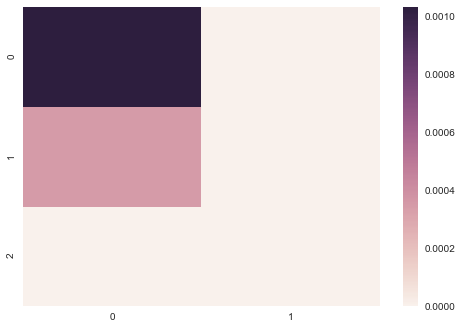

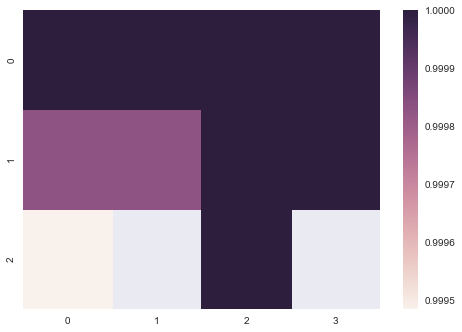

In [14]:
rows = []
for idx in range(0, len(means_test)):
    rows.append((means_test[idx], stds_test[idx], means_train[idx], stds_train[idx]))

df = pd.DataFrame(rows)
df.columns = ('test-auc-mean', 'test-auc-std', 'train-auc-mean', 'train-auc-std')

import seaborn
from seaborn import plt
source_perf = pd.pivot_table(df[['test-auc-mean', 'test-auc-std', 'train-auc-mean', 'train-auc-std']], columns=['train-auc-mean'], index=['test-auc-mean'])
seaborn.heatmap(np.array(source_perf))
plt.show()

target_perf = pd.pivot_table(df[['test-auc-mean', 'test-auc-std', 'train-auc-mean', 'train-auc-std']], columns=['train-auc-std'], index=['test-auc-std'])
seaborn.heatmap(np.array(target_perf))
plt.show()